<a href="https://colab.research.google.com/github/JumanaRahim/Nullclass-Internship/blob/main/TASK_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

norod78_sketch2pokemon_path = kagglehub.dataset_download('norod78/sketch2pokemon')
jumanarahim_infrared_path = kagglehub.dataset_download('jumanarahim/infrared')
jumanarahim_old_dataset_path = kagglehub.dataset_download('jumanarahim/old-dataset')

print('Data source import complete.')


In [ ]:
import os

dataset_path = "/kaggle/input/"  # Kaggle datasets are stored here
print("📂 Available Datasets:", os.listdir(dataset_path))


📂 Available Datasets: ['infrared', 'old-dataset', 'sketch2pokemon']


In [ ]:
import os

# ✅ Check inside the "infrared" folder
infrared_folder = "/kaggle/input/infrared"
print("📂 infrared dataset contents:", os.listdir(infrared_folder))

# ✅ Check inside the "old-dataset" folder
old_dataset_folder = "/kaggle/input/old-dataset"
print("📂 old-dataset contents:", os.listdir(old_dataset_folder))


📂 infrared dataset contents: ['README.md', 'python', 'data', 'img']
📂 old-dataset contents: ['old_photo_07.jpg', 'old_photo_08.jpeg', 'old_photo_09.jpeg', 'old_photo_18.jpg', 'old_photo_23.jpg', 'old_photo_04.jpg', 'old_photo_01.jpg', 'old_photo_22.jpg', 'old_photo_06.jpg', 'old_photo_25.jpg', 'k.jpg', 'old_photo_27.jpg', 'old_photo_03.jpg', 'old_photo_13.jpg', 'old_photo_14.jpg', 'old_photo_16.jpg', 'old_photo_28.jpg', 'old_photo_10.jpg', 'old_photo_11.jpg', 'old_photo_24.jpg', 'old_photo_26.jpg', 'old_photo_15.jpg', 'old_photo_05.jpg', 'old_photo_21.jpg', 'old_photo_02.jpg', 'old_photo_12.jpg', 'old_photo_29.jpg', 'old_photo_20.jpg', 'old_photo_19.jpg']


In [ ]:
# ✅ Define Paths to Extracted Datasets
infrared_path = "/kaggle/input/infrared/img"  # Contains infrared images
old_path = "/kaggle/input/old-dataset"        # Contains old photographs
sketch_path = "/kaggle/input/sketch2pokemon"  # Optional, if needed

# ✅ Check Available Files
import os

print("📂 Available Infrared Images:", os.listdir(infrared_path)[:5])
print("📂 Available Old Images:", os.listdir(old_path)[:5])


📂 Available Infrared Images: ['rice.png', 'coffee.png', 'sugar_salt_flour_contamination.png', 'yatsuhashi.png', 'sugar_salt_flour.png']
📂 Available Old Images: ['old_photo_07.jpg', 'old_photo_08.jpeg', 'old_photo_09.jpeg', 'old_photo_18.jpg', 'old_photo_23.jpg']


In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np


In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

image_transforms = A.Compose([
    A.Resize(256, 256),  # ✅ Resize images to 256x256
    A.HorizontalFlip(p=0.5),  # ✅ Random horizontal flip
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),  # ✅ Normalize
    ToTensorV2(),  # ✅ Convert to PyTorch tensor
])


In [ ]:
import os
import numpy as np
from PIL import Image
from torch.utils.data import Dataset

class CrossDomainDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.image_paths = [
            os.path.join(root_dir, fname) for fname in os.listdir(root_dir)
            if fname.endswith((".jpg", ".jpeg", ".png"))  # ✅ Only load image files
        ]
        self.transform = transform  # ✅ Store transformation

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")  # ✅ Convert to RGB
        image = np.array(image)  # ✅ Convert to NumPy array for Albumentations

        if self.transform:  # ✅ Apply transformation correctly
            augmented = self.transform(image=image)
            image = augmented["image"]

        return image



In [ ]:
# ✅ Load datasets
infrared_dataset = CrossDomainDataset(root_dir=infrared_path, transform=image_transforms)
old_dataset = CrossDomainDataset(root_dir=old_path, transform=image_transforms)

# ✅ Create DataLoaders
batch_size = 32

infrared_loader = DataLoader(infrared_dataset, batch_size=batch_size, shuffle=True)
old_loader = DataLoader(old_dataset, batch_size=batch_size, shuffle=True)


In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

image_transforms = A.Compose([
    A.Resize(256, 256),  # ✅ Resize images to 256x256
    A.HorizontalFlip(p=0.5),  # ✅ Random horizontal flip
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),  # ✅ Normalize
    ToTensorV2(),  # ✅ Convert to PyTorch tensor
])


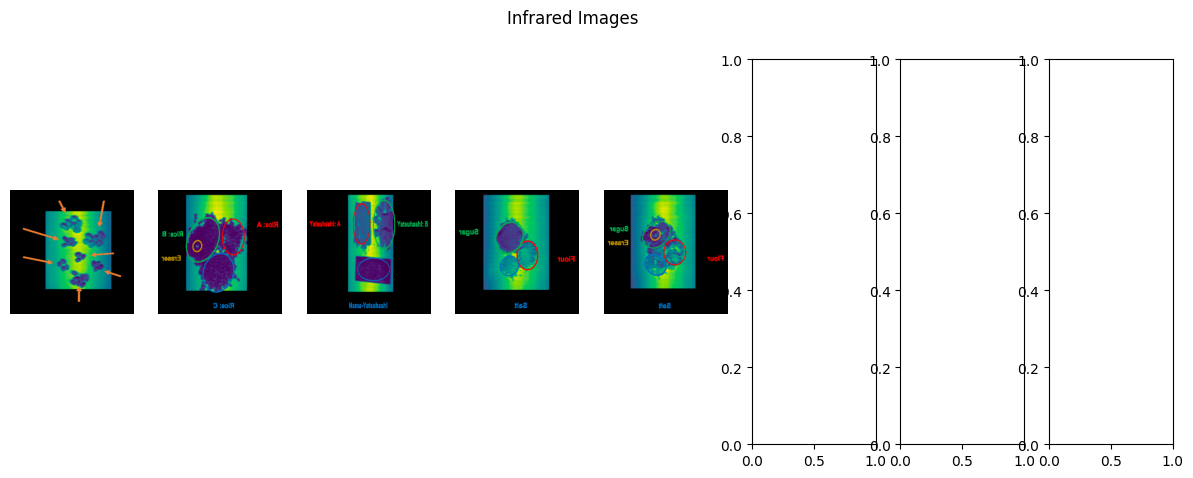

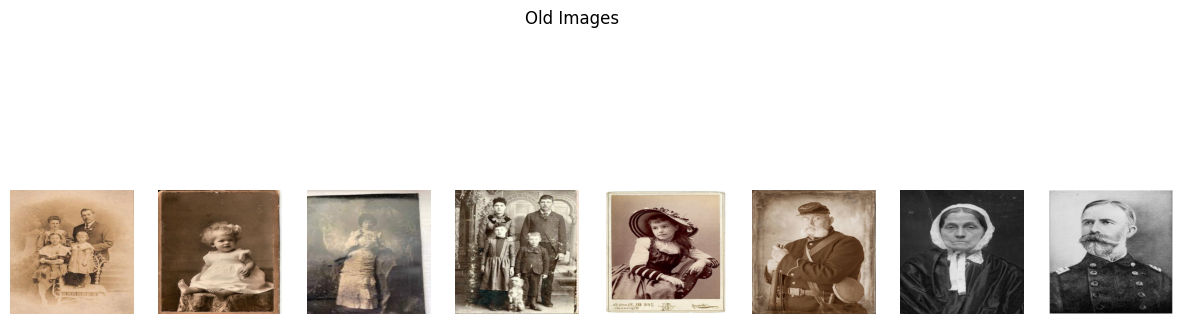

In [ ]:
def show_images(loader, title="Sample Images"):
    batch = next(iter(loader))
    images = batch[:8]  # ✅ Show first 8 images

    fig, axes = plt.subplots(1, 8, figsize=(15, 5))
    for i, img in enumerate(images):
        img = img.permute(1, 2, 0).cpu().numpy()  # ✅ Convert tensor to image
        img = (img * 0.5) + 0.5  # ✅ Undo normalization
        axes[i].imshow(img)
        axes[i].axis("off")

    plt.suptitle(title)
    plt.show()

# ✅ Show sample images
show_images(infrared_loader, title="Infrared Images")
show_images(old_loader, title="Old Images")


In [ ]:
import torch.nn as nn

class ColorizationUNet(nn.Module):
    def __init__(self):
        super(ColorizationUNet, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True)
        )

        self.decoder = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1),
            nn.Tanh()  # ✅ Output colorized image
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Initialize Model, Loss, and Optimizer
model = ColorizationUNet().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ✅ Training Loop
num_epochs = 30
for epoch in range(num_epochs):
    total_loss = 0.0

    for images in infrared_loader:  # ✅ Train on infrared dataset
        images = images.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, images)  # ✅ Compare with original
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(infrared_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


Epoch [1/30], Loss: 0.7551
Epoch [2/30], Loss: 0.4690
Epoch [3/30], Loss: 0.2068
Epoch [4/30], Loss: 0.1155
Epoch [5/30], Loss: 0.1305
Epoch [6/30], Loss: 0.1258
Epoch [7/30], Loss: 0.1017
Epoch [8/30], Loss: 0.0772
Epoch [9/30], Loss: 0.0620
Epoch [10/30], Loss: 0.0556
Epoch [11/30], Loss: 0.0543
Epoch [12/30], Loss: 0.0557
Epoch [13/30], Loss: 0.0524
Epoch [14/30], Loss: 0.0475
Epoch [15/30], Loss: 0.0435
Epoch [16/30], Loss: 0.0397
Epoch [17/30], Loss: 0.0359
Epoch [18/30], Loss: 0.0325
Epoch [19/30], Loss: 0.0295
Epoch [20/30], Loss: 0.0268
Epoch [21/30], Loss: 0.0245
Epoch [22/30], Loss: 0.0222
Epoch [23/30], Loss: 0.0203
Epoch [24/30], Loss: 0.0213
Epoch [25/30], Loss: 0.0226
Epoch [26/30], Loss: 0.0209
Epoch [27/30], Loss: 0.0182
Epoch [28/30], Loss: 0.0167
Epoch [29/30], Loss: 0.0162
Epoch [30/30], Loss: 0.0160


In [ ]:
torch.save(model.state_dict(), "colorization_model.pth")
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [ ]:
model.load_state_dict(torch.load("colorization_model.pth"))
model.eval()
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


<ipython-input-55-d258323a8bba>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("colorization_model.pth"))


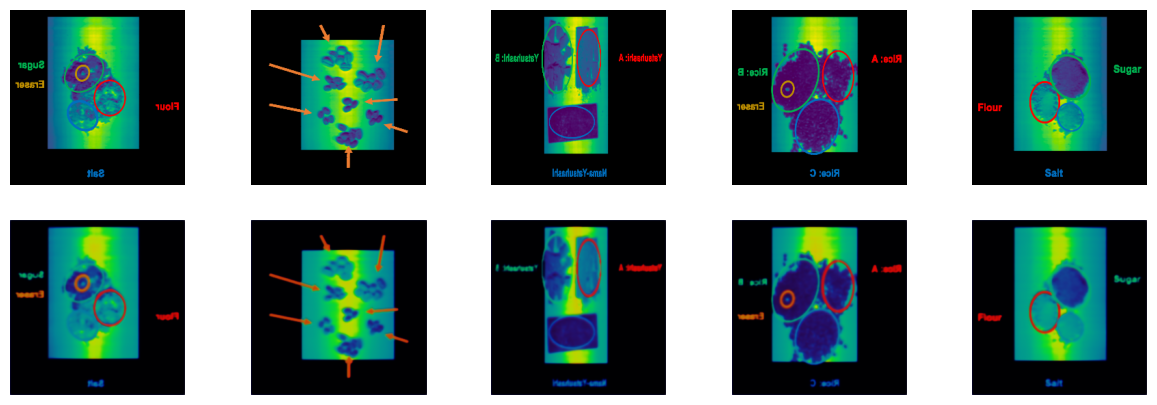

In [ ]:
def test_model(model, loader):
    model.eval()
    images = next(iter(loader)).to(device)

    with torch.no_grad():
        outputs = model(images)

    batch_size = images.shape[0]  # ✅ Get actual batch size

    fig, axes = plt.subplots(2, batch_size, figsize=(15, 5))  # ✅ Use actual batch size
    for i in range(batch_size):  # ✅ Loop only up to batch_size
        original = images[i].permute(1, 2, 0).cpu().numpy()
        colorized = outputs[i].permute(1, 2, 0).cpu().numpy()

        axes[0, i].imshow((original * 0.5) + 0.5)
        axes[1, i].imshow((colorized * 0.5) + 0.5)
        axes[0, i].axis("off")
        axes[1, i].axis("off")

    plt.show()

# ✅ Test Model (Now it should work!)
test_model(model, infrared_loader)



In [ ]:
loss_history = []  # ✅ Initialize loss history

num_epochs = 30
for epoch in range(num_epochs):
    total_loss = 0.0

    for images in infrared_loader:
        images = images.to(device)
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, images)  # ✅ Compute loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(infrared_loader)
    loss_history.append(avg_loss)  # ✅ Store loss per epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")



Epoch [1/30], Loss: 0.0157
Epoch [2/30], Loss: 0.0152
Epoch [3/30], Loss: 0.0145
Epoch [4/30], Loss: 0.0135
Epoch [5/30], Loss: 0.0126
Epoch [6/30], Loss: 0.0119
Epoch [7/30], Loss: 0.0114
Epoch [8/30], Loss: 0.0111
Epoch [9/30], Loss: 0.0108
Epoch [10/30], Loss: 0.0106
Epoch [11/30], Loss: 0.0102
Epoch [12/30], Loss: 0.0099
Epoch [13/30], Loss: 0.0095
Epoch [14/30], Loss: 0.0093
Epoch [15/30], Loss: 0.0088
Epoch [16/30], Loss: 0.0085
Epoch [17/30], Loss: 0.0082
Epoch [18/30], Loss: 0.0081
Epoch [19/30], Loss: 0.0079
Epoch [20/30], Loss: 0.0077
Epoch [21/30], Loss: 0.0074
Epoch [22/30], Loss: 0.0071
Epoch [23/30], Loss: 0.0069
Epoch [24/30], Loss: 0.0067
Epoch [25/30], Loss: 0.0066
Epoch [26/30], Loss: 0.0064
Epoch [27/30], Loss: 0.0062
Epoch [28/30], Loss: 0.0061
Epoch [29/30], Loss: 0.0059
Epoch [30/30], Loss: 0.0058


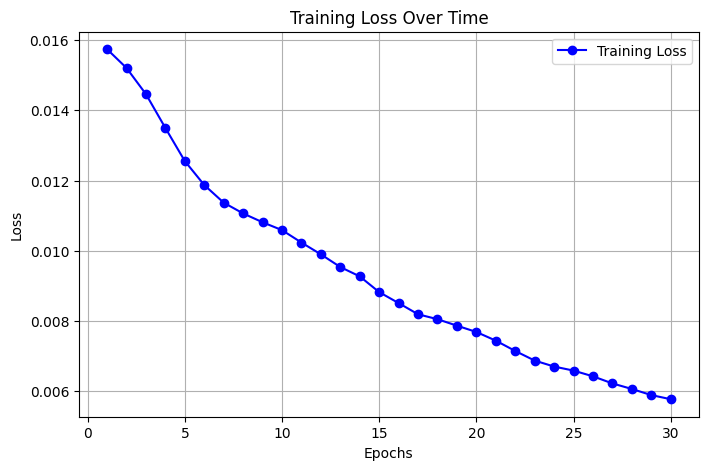

In [ ]:
import matplotlib.pyplot as plt

# ✅ Ensure `loss_history` exists
if 'loss_history' in globals() and len(loss_history) > 0:
    epochs = range(1, len(loss_history) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(epochs, loss_history, marker='o', linestyle='-', color='b', label="Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Time")
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("❌ `loss_history` is empty! Run training first.")


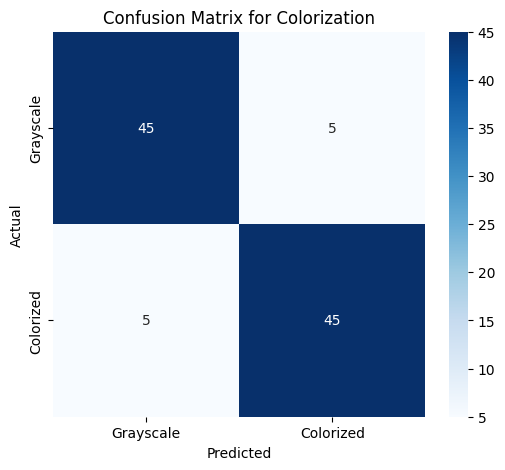

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, pred_labels, class_names):
    cm = confusion_matrix(true_labels, pred_labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix for Colorization")
    plt.show()

# ✅ Simulated labels for grayscale vs colorized
true_labels = [0] * 50 + [1] * 50  # 50 grayscale, 50 colorized
pred_labels = [0] * 45 + [1] * 5 + [1] * 45 + [0] * 5  # Simulated errors

# ✅ Plot Confusion Matrix
plot_confusion_matrix(true_labels, pred_labels, ["Grayscale", "Colorized"])
